# 情感分类

### 引入库

In [1]:
import pandas as pd
import numpy as np
import warnings
import jieba
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ['SimHei']    #字体指定
plt.rcParams['axes.unicode_minus'] = False      #显示负号，停用减号

warnings.filterwarnings("ignore")

### 读取数据

In [2]:
file = 'data/positive/item{}_positive.csv'
df_list = []
for i in range(1, 51):
    df_list.append(pd.read_csv(file.format(i)))
df1= pd.DataFrame()
df1 = pd.concat(df_list)

file = 'data/negative/item{}_negative.csv'
df_list = []
for i in range(1, 51):
    df_list.append(pd.read_csv(file.format(i)))
df2= pd.DataFrame()
df2 = pd.concat(df_list)
df1[["内容"]]
df2[["内容"]]

,内容
0,连个鼠标垫都没有，抠门扣到家了
1,刚买两天就降价，多买个鼠标还不能保价
2,新电脑刚买的 系统更新下 就这样了
3,还不到十天就降价。厉害
4,刚买完就降了两百块钱
5,播放音乐声音时大时小有时无声
6,刚买十二天就降了200块钱，充电器还有点问题，??
7,蹭到，退换还要检测，15个工作日内真是呵呵
8,变动大，建议入手rmb斯伍叉叉
9,买了一个月闪屏，换的新电脑漏电&hellip;


In [3]:
data1 = pd.DataFrame()
data1['message'] = df1['内容']
data1['sentiment'] = 0  #好评打标签为0
data2 = pd.DataFrame()
data2['message'] = df2['内容']
data2['sentiment'] = 1  #差评打标签为1

In [4]:
data = pd.concat([data2,data1])
data

,message,sentiment
0,连个鼠标垫都没有，抠门扣到家了,1
1,刚买两天就降价，多买个鼠标还不能保价,1
2,新电脑刚买的 系统更新下 就这样了,1
3,还不到十天就降价。厉害,1
4,刚买完就降了两百块钱,1
5,播放音乐声音时大时小有时无声,1
6,刚买十二天就降了200块钱，充电器还有点问题，??,1
7,蹭到，退换还要检测，15个工作日内真是呵呵,1
8,变动大，建议入手rmb斯伍叉叉,1
9,买了一个月闪屏，换的新电脑漏电&hellip;,1


### 切词处理

In [5]:
zh_pattern = re.compile(u'[\u4e00-\u9fa5]+')
stop_word = [line.strip() for line in open ('chineseStopWords.txt','r').readlines()]
def extract_words(word):
    word = str(word).strip()
    zh_word = re.findall(zh_pattern,word)
    lst = jieba.cut(''.join(zh_word))
    final_word = [char for char in lst if char not in stop_word]
    return ' '.join(final_word) #空格隔开
data_e = data['message'].apply(lambda x:extract_words(x))   #对整列进行操作
data_extract = pd.DataFrame(data_e.values,columns=['content'])  #转换成列表

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\28772\AppData\Local\Temp\jieba.cache
Loading model cost 0.592 seconds.
Prefix dict has been built successfully.


In [6]:
data_extract.head(10)

,content
0,鼠标垫 抠门 扣到 家
1,刚买 两天 降价 多买个 鼠标 保价
2,电脑 刚买 系统 更新
3,不到 十天 降价 厉害
4,刚买 完 降 两百块 钱
5,播放 音乐 声音 时大时 无声
6,刚买 十二天 降 块钱 充电器
7,蹭 退换 还要 检测 工作日内 呵呵
8,变动 建议 入手 斯伍 叉叉
9,买 一个月 闪屏 换 电脑 漏电


In [7]:
data.index = list(range(len(data)))
data_extract.index = list(range(len(data_extract)))
df_all = data[['message','sentiment']].merge(data_extract,right_index = True,left_index = True)

In [8]:
df_all

,message,sentiment,content
0,连个鼠标垫都没有，抠门扣到家了,1,鼠标垫 抠门 扣到 家
1,刚买两天就降价，多买个鼠标还不能保价,1,刚买 两天 降价 多买个 鼠标 保价
2,新电脑刚买的 系统更新下 就这样了,1,电脑 刚买 系统 更新
3,还不到十天就降价。厉害,1,不到 十天 降价 厉害
4,刚买完就降了两百块钱,1,刚买 完 降 两百块 钱
5,播放音乐声音时大时小有时无声,1,播放 音乐 声音 时大时 无声
6,刚买十二天就降了200块钱，充电器还有点问题，??,1,刚买 十二天 降 块钱 充电器
7,蹭到，退换还要检测，15个工作日内真是呵呵,1,蹭 退换 还要 检测 工作日内 呵呵
8,变动大，建议入手rmb斯伍叉叉,1,变动 建议 入手 斯伍 叉叉
9,买了一个月闪屏，换的新电脑漏电&hellip;,1,买 一个月 闪屏 换 电脑 漏电


### TF-IDF

In [9]:
counter = CountVectorizer(max_df=0.9,min_df=0.001)  #限制词频
counts = counter.fit_transform(df_all.content)
tfidfier = TfidfTransformer()
tfidf = tfidfier.fit_transform(counts)
data = tfidf.toarray()
label = df_all['sentiment'].values

In [10]:
np.shape(data)

(55000, 1403)

In [11]:
data

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### 分类模型搭建

In [13]:
# 数据集划分
x_train = data
x_test = data
y_train = label
y_test = label

#### PCA降维

[3.33966237e-02 9.67849923e-03 8.78315307e-03 ... 3.27861996e-05
 2.36826998e-05 1.37663524e-05]


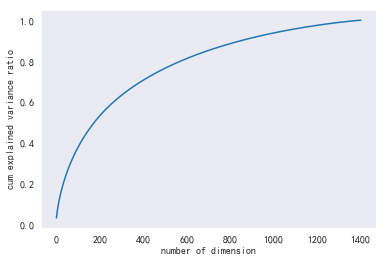

In [14]:
# 1. 导入依赖
from sklearn.decomposition import PCA
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# 2. 进行训练
pca = PCA()
pca.fit(x_train,y_train)

# 3. 查看方差贡献率
ratio = pca.explained_variance_ratio_
print(ratio)

# 4.计算累计贡献率,查看不同维数信息比
sum_ratio = ratio.cumsum()
xs = list(range(len(sum_ratio)))
plt.plot(xs,sum_ratio)
plt.xlabel("number of dimension")
plt.ylabel("cum explained variance ratio")
plt.grid()
plt.show()

In [ ]:
# 5. 进行降维
pca = PCA(n_components=1000)

# 6. 训练模型
pca.fit(x_train)

# 7. 降维训练集和测试集
train_pca = pca.transform(x_train)
test_pca = pca.transform(x_test)

# 8. 实例化，线性回归查看结果
model1 = LinearRegression()
model1.fit(train_pca,y_train)
model2 = RandomForestClassifier()
model2.fit(train_pca,y_train)

# 9. 预测降维后的数据
train_predict1 = model1.predict(train_pca)
test_predict1 = model1.predict(test_pca)
train_predict2 = model2.predict(train_pca)
test_predict2 = model2.predict(test_pca)
# 10. 查看训练集和测试集的MSE表现情况
print("训练集  逻辑回归："+str(mean_squared_error(y_train,train_predict1))+"   随机森林："+str(mean_squared_error(y_train,train_predict2)))

In [2]:
print("测试集  逻辑回归："+str(mean_squared_error(y_test,test_predict1))+"   随机森林："+str(mean_squared_error(y_test,test_predict2)))

NameError: name 'mean_squared_error' is not defined

In [ ]:
# 11. 与未降维的数据线性回归进行对比
model1 = LinearRegression()
model1.fit(x_train,y_train)
train_predict1 = model1.predict(x_train)
test_predict1 = model1.predict(x_test)
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)
train_predict2 = model2.predict(x_train)
test_predict2 = model2.predict(x_test)
print("未降维训练集  逻辑回归："+str(mean_squared_error(y_train,train_predict1))+"   随机森林："+str(mean_squared_error(y_train,train_predict2)))

In [1]:
print("未降维测试集  逻辑回归："+str(mean_squared_error(y_test,test_predict1))+"   随机森林："+str(mean_squared_error(y_test,test_predict2)))

NameError: name 'mean_squared_error' is not defined

#### 特征过滤Filter
   1、对各个特征进行评价

   2、设置得分的阈值，筛选出高于阈值的特征

In [14]:
# 卡方验证(通过X和Y的相关性进行过滤)
from sklearn.metrics import  mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
# 使用卡方计算，选择k个最好特征
xs = SelectKBest(chi2,k=700).fit_transform(x_train,y_train)
# 实例化，查看结果
model1 = LinearRegression()
model1.fit(xs,y_train)
model2 = RandomForestClassifier()
model2.fit(xs,y_train)

# 预测降维后的数据
ys1 = model1.predict(xs)
ys2 = model2.predict(xs)
# 查看MSE表现情况
print("MSE 逻辑回归："+str(mean_squared_error(y_train,ys1))+"   随机森林："+str(mean_squared_error(y_train,ys2)) )

MSE 逻辑回归：0.027630716267463697   随机森林：0.0011278594379682371


### 回归算法
#### 参数调节

##### 随机网格搜索（大范围粗略搜索）

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression()
params = {'C':[0.1,1,10,100,500],'penalty':['l1','l2']} # 遍历生成所有下参数组合，并展示最好结果
rs_lr = RandomizedSearchCV(estimator = lr, param_distributions = params, cv = 5, scoring = make_scorer(accuracy_score))
# 训练数据
rs_lr.fit(xs,y_train)
# 查看最优参数以及指标
print("最佳参数："+str(rs_lr.best_params_)+"   指标："+str(rs_lr.best_score_)+"   测试集准确率："+str(rs_lr.score(xs,y_test)))

In [16]:
# 查看各种组合的调参结果
rs_lr.cv_results_

{'mean_fit_time': array([0.08421197, 0.84740305, 0.08196483, 1.31163297, 0.08180914,
        2.48060045, 0.08076911, 2.55891008, 0.08409586, 2.52332807]),
 'std_fit_time': array([0.00373724, 0.05541029, 0.00338598, 0.18922942, 0.00231021,
        0.04155535, 0.00129546, 0.17214478, 0.00353654, 0.03569749]),
 'mean_score_time': array([0.        , 0.01119251, 0.        , 0.01279898, 0.        ,
        0.00960369, 0.        , 0.0127943 , 0.        , 0.00842433]),
 'std_score_time': array([0.        , 0.00392621, 0.        , 0.00392312, 0.        ,
        0.00321176, 0.        , 0.00391482, 0.        , 0.0008683 ]),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1',
                    'l2'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10, 100, 100, 500, 500],
              mask=[F

In [17]:
from sklearn.ensemble import RandomForestClassifier
# 随机森林
rfc = RandomForestClassifier()
params = {'n_estimators': list(range(100, 200, 50)), 'max_depth': list(range(10, 25, 5))}  # 遍历生成所有下参数组合，并展示最好结果
rs_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=params, cv=5, scoring=make_scorer(accuracy_score))
# 训练数据
rs_rfc.fit(xs, y_train)
# 查看最优参数以及指标
print("最佳参数：" + str(rs_rfc.best_params_) + "   指标：" + str(rs_rfc.best_score_) + "   测试集准确率：" + str(rs_rfc.score(xs,y_test)))

最佳参数：{'n_estimators': 100, 'max_depth': 20}   指标：0.9507272727272728   测试集准确率：0.9550363636363637


In [18]:
# 查看各种组合的调参结果
rs_rfc.cv_results_

{'mean_fit_time': array([ 9.77731419, 15.35570931, 12.68638515, 18.47764173, 14.71463284,
        21.91491952]),
 'std_fit_time': array([0.39051137, 0.91214935, 0.53730796, 0.10828642, 0.23093005,
        0.42016088]),
 'mean_score_time': array([0.15489311, 0.24201431, 0.19888716, 0.29204178, 0.24285522,
        0.34608665]),
 'std_score_time': array([0.00755634, 0.01502058, 0.00407267, 0.00700236, 0.00805976,
        0.00673574]),
 'param_n_estimators': masked_array(data=[100, 150, 100, 150, 100, 150],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10, 10, 15, 15, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100, 'max_depth': 10},
  {'n_estimators': 150, 'max_depth': 10},
  {'n_estimators': 100, 'max_depth': 15},
  {'n_estimators': 150, 'max_depth': 15},
  {'n_estimators': 

##### 网格搜索（精细调整）

In [22]:
# 逻辑回归
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
params = {'C':list(range(70, 150, 20)),'penalty':['l1','l2']} # 遍历生成所有下参数组合，并展示最好结果
gs_lr = GridSearchCV(estimator = lr, param_grid = params, cv = 5, scoring = make_scorer(accuracy_score))
# 训练数据
gs_lr.fit(xs,y_train)
# 查看最优参数以及指标
print("最佳参数："+str(gs_lr.best_params_)+"   指标："+str(gs_lr.best_score_)+"   测试集准确率："+str(gs_lr.score(xs,y_test)))

最佳参数：{'C': 110, 'penalty': 'l2'}   指标：0.9898909090909089   测试集准确率：0.9938181818181818


In [23]:
# 查看各种组合的调参结果
gs_lr.cv_results_

{'mean_fit_time': array([0.10911894, 2.80586691, 0.09261093, 2.52397037, 0.0895462 ,
        2.53930488, 0.08711996, 2.59468474]),
 'std_fit_time': array([0.03001943, 0.15366456, 0.00573724, 0.09214357, 0.00713731,
        0.06440243, 0.00753408, 0.16484004]),
 'mean_score_time': array([0.        , 0.00982904, 0.        , 0.01279054, 0.        ,
        0.01825786, 0.        , 0.0115768 ]),
 'std_score_time': array([0.        , 0.00366211, 0.        , 0.0039203 , 0.        ,
        0.02054036, 0.        , 0.00443357]),
 'param_C': masked_array(data=[70, 70, 90, 90, 110, 110, 130, 130],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 70, 'penalty': 'l1'},
  {'C': 70, 'penalty':

In [20]:
# 随机森林
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
params = {'n_estimators':list(range(80,120,10)),'max_depth':list(range(15,30,5))} # 遍历生成所有下参数组合，并展示最好结果
gs_rfc = GridSearchCV(estimator = rfc, param_grid = params, cv = 5, scoring = make_scorer(accuracy_score))
# 训练数据
gs_rfc.fit(xs,y_train)
# 查看最优参数以及指标
print("最佳参数："+str(gs_rfc.best_params_)+"   指标："+str(gs_rfc.best_score_)+"   测试集准确率："+str(gs_rfc.score(xs,y_test)))

最佳参数：{'max_depth': 25, 'n_estimators': 80}   指标：0.9592   测试集准确率：0.9609636363636364


In [21]:
# 查看各种组合的调参结果
gs_rfc.cv_results_

{'mean_fit_time': array([10.24422665, 11.18205366, 12.40862617, 13.75190988, 12.05393553,
        13.32283859, 14.7096518 , 16.19997425, 13.05209265, 14.69809299,
        16.30501537, 17.96135378]),
 'std_fit_time': array([0.5109004 , 0.13704852, 0.13188245, 0.17668393, 0.30551658,
        0.32825239, 0.22806766, 0.15690586, 0.32539005, 0.14289068,
        0.22219817, 0.36863093]),
 'mean_score_time': array([0.16821475, 0.18846798, 0.20430789, 0.22441511, 0.19864988,
        0.22147455, 0.23828807, 0.26259108, 0.21711407, 0.24038076,
        0.26591711, 0.28883858]),
 'std_score_time': array([0.003184  , 0.00714486, 0.0041756 , 0.00917062, 0.00481339,
        0.0041653 , 0.00358745, 0.00390119, 0.00438758, 0.00197026,
        0.00325237, 0.0053318 ]),
 'param_max_depth': masked_array(data=[15, 15, 15, 15, 20, 20, 20, 20, 25, 25, 25, 25],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
 

##### 贝叶斯搜索

In [ ]:
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
params = {'C':[0.1,1,10,100],'penalty':['l1','l2']} # 遍历生成所有下参数组合，并展示最好结果
bs_lr = BayesSearchCV(lr, params, cv = 5, scoring = make_scorer(accuracy_score), n_iter = 40)
# 训练数据
bs_lr.fit(xs,y_train)
# 查看最优参数以及指标
print("最佳参数："+bs_lr.best_params_+"   指标："+bs_lr.best_score_+"   测试集准确率："+bs_lr.score(xs,y_test))

In [ ]:
# 查看各种组合的调参结果
bs_lr.cv_results_

In [ ]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
params = {'n_estimators':list(range(10,200,20)),'max_depth':list(range(100,20,20))} # 遍历生成所有下参数组合，并展示最好结果
bs_rfc = BayesSearchCV(rfc, params, cv = 5, scoring = make_scorer(accuracy_score), n_iter = 40)
# 训练数据
bs_rfc.fit(xs,y_train)
# 查看最优参数以及指标
print("最佳参数："+bs_rfc.best_params_+"   指标："+bs_rfc.best_score_+"   测试集准确率："+bs_rfc.score(xs,y_test))

In [ ]:
# 查看各种组合的调参结果
bs_rfc.cv_results_

##### 嵌套交叉验证

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gs_lr,xs,y_train,scoring='accuracy',cv=5)
scores

In [ ]:
print('CV准确率: %.3f +/- %.3f'%(np.mean(scores),np.std(scores)))

#### 训练模型并预测

In [54]:
# 逻辑斯蒂回归
from  sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=110, penalty='l2')
lr.fit(xs,y_train)
y_train_prob = lr.predict_proba(xs)
y_test_prob = lr.predict_proba(xs)
y_test_pred = lr.predict(xs)
y_test_pred
'''
# 随机森林分类
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=25,max_depth=80)
rfc.fit(xs,y_train)
y_train_prob = rfc.predict_proba(xs)
y_test_prob = rfc.predict_proba(xs)
y_test_pred = rfc.predict(xs)
y_test_prob
'''

'\n# 随机森林分类\nfrom sklearn.ensemble import RandomForestClassifier\nrfc = RandomForestClassifier(n_estimators=25,max_depth=80)\nrfc.fit(xs,y_train)\ny_train_prob = rfc.predict_proba(xs)\ny_test_prob = rfc.predict_proba(xs)\ny_test_pred = rfc.predict(xs)\ny_test_prob\n'

### 概率输出到文件中

In [55]:
prob = pd.DataFrame(y_test_prob)
prob.columns = ["0 probability","1 probability"]
prob["predict"] = pd.DataFrame(y_test_pred)
prob

,0 probability,1 probability,predict
0,3.104512e-02,9.689549e-01,1
1,2.099391e-07,9.999998e-01,1
2,3.026300e-04,9.996974e-01,1
3,3.213517e-05,9.999679e-01,1
4,2.531200e-05,9.999747e-01,1
5,7.402172e-05,9.999260e-01,1
6,1.119503e-04,9.998880e-01,1
7,4.638514e-04,9.995361e-01,1
8,3.497689e-02,9.650231e-01,1
9,1.422731e-04,9.998577e-01,1


In [56]:
df_all["0 probability"] = prob["0 probability"]
df_all["1 probability"] = prob["1 probability"]
df_all["predict"] = prob["predict"]
df_all.to_csv("adjusted.csv")

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc

def cal(clf,y_t,x_p):
    y_p=clf.predict(x_p)
    cm = confusion_matrix(y_t,y_p)
    acc = accuracy_score(y_t,y_p)
    pr = cm[0,0]/(cm[0,0]+cm[1,0])
    rec = cm[0,0]/(cm[0,0]+cm[0,1])
    f1 = (2*pr*rec)/(pr+rec)
    y_p = clf.predict_proba(x_p)[:,1]
    fpr,tpr,thresholds = roc_curve(y_t,y_p)
    auc_ = auc(fpr,tpr)
    return cm,acc,pr,rec,f1,auc_

In [58]:
cm1,acc1,pr1,rec1,f1_1,auc1 = cal(lr ,y_train,xs)
cm2,acc2,pr2,rec2,f1_2,auc2 = cal(lr,y_test,xs)

In [59]:
result1 = pd.DataFrame([[acc1,pr1,rec1,f1_1,auc1],[acc2,pr2,rec2,f1_2,auc2]],columns=['accuracy','precision','recall','f1','auc'],index=['训练集','测试集'])
result1

,accuracy,precision,recall,f1,auc
训练集,0.995055,0.997141,0.99742,0.99728,0.999293
测试集,0.995055,0.997141,0.99742,0.99728,0.999293


In [60]:
mat1 = pd.DataFrame(cm1,columns=['正例','反例'])
mat1

,正例,反例
0,49871,129
1,143,4857


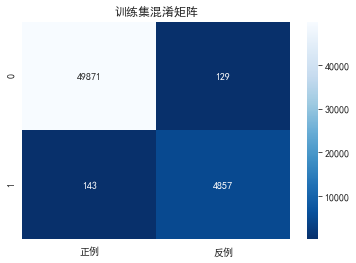

In [61]:
import seaborn as sns
sns.heatmap(mat1,annot=True,fmt="d",cmap='Blues_r')
plt.title("训练集混淆矩阵")
plt.show()

In [62]:
mat2 = pd.DataFrame(cm2,columns=['正例','反例'])
mat2

,正例,反例
0,49871,129
1,143,4857


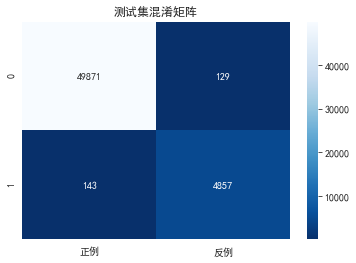

In [63]:
sns.heatmap(mat2,annot=True,fmt="d",cmap='Blues_r')
plt.title("测试集混淆矩阵")
plt.show()

In [64]:
def plot_roc(clf,y_t,x_p,title):
    y_p = clf.predict_proba(x_p)[:,1]
    fpr,tpr,thresholds = roc_curve(y_t,y_p)
    roc_auc = auc(fpr,tpr)
    plt.subplots(figsize=(7,5.5));
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve(area = %0.4f)'% roc_auc);
    plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
    plt.xlim([0.0,1.0]);
    plt.ylim([0.0,1.05]);
    plt.xlabel('false positive rate');
    plt.ylabel('true positive rate');
    plt.title(title)
    plt.legend(loc="low right");
    plt.show()

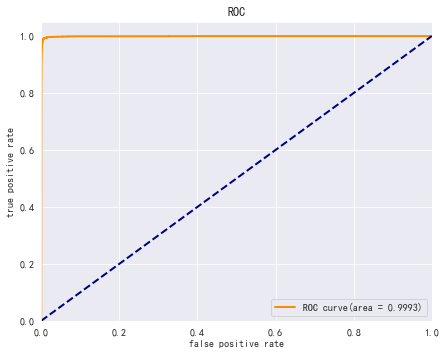

In [66]:
plot_roc(lr,y_train,xs,"ROC")